In [3]:
#import tensorflow.keras as keras
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf

from numpy import array, split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, Dropout, Reshape, Permute, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling3D, ConvLSTM2D

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.callbacks
import os, random

import pandas as pd
from sklearn.utils import shuffle

'''
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import expand_dims, nn

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from numpy import array, split
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, TimeDistributed, Dropout, Reshape, Permute, Activation
from keras.layers import Convolution2D, MaxPooling3D, ConvLSTM2D
from keras.layers.recurrent import LSTM  
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D
import keras.callbacks
import os, random
'''

'\nimport keras\nfrom keras import layers\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow import expand_dims, nn\n\nimport pandas as pd\nimport tensorflow as tf\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\n\nfrom numpy import array, split\nfrom keras.models import Sequential, Model\nfrom keras.layers import Dense, Flatten, TimeDistributed, Dropout, Reshape, Permute, Activation\nfrom keras.layers import Convolution2D, MaxPooling3D, ConvLSTM2D\nfrom keras.layers.recurrent import LSTM  \nfrom keras.layers.convolutional import Conv1D\nfrom keras.layers.convolutional import Conv2D\nfrom keras.layers.convolutional import MaxPooling1D\nimport keras.callbacks\nimport os, random\n'

In [44]:
#Load NSW data
x = pd.read_csv("C:\\Users\\mccan\\Desktop\\Bous1Ddata\\xmat9_sin.csv").values
h = pd.read_csv("C:\\Users\\mccan\\Desktop\\Bous1Ddata\\hmat9_sin.csv").values
eta = pd.read_csv("C:\\Users\\mccan\\Desktop\\Bous1Ddata\\etamat9_sin.csv").values
#Q = pd.read_csv("Qmat.csv").values
P = pd.read_csv("C:\\Users\\mccan\\Desktop\\Bous1Ddata\\Pmat9_sin.csv").values*1000000
u = pd.read_csv("C:\\Users\\mccan\\Desktop\\Bous1Ddata\\umat9_sin.csv").values
#v = pd.read_csv("vmat.csv").values

# Load difference between NSW and Bouss
Pdiff = pd.read_csv("C:\\Users\\mccan\\Desktop\\Bous1Ddata\\Pdiff9_sin.csv").values
Pdiff=Pdiff*100
etadiff = pd.read_csv("C:\\Users\\mccan\\Desktop\\Bous1Ddata\\etadiff9_sin.csv").values

data = np.stack((x,u,P,h,Pdiff,eta), axis = 2)
print(np.shape(data))
#diff = np.stack((Pdiff,etadiff), axis = 2)

(2504, 301, 6)


(2503, 1, 301, 6)
(2503, 1, 301, 6)
(301,)


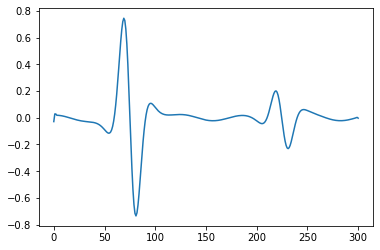

In [25]:
X, y = list(), list()
length = int(data.shape[0])
# how many time steps to predict the next time step
n = 1

for i in range(length):
  endi = i + n
  if endi > length - 1:
    break

  seq_x, seq_y = data[i:endi, :, :], Pdiff[endi, :]
  X.append(seq_x)
  y.append(seq_y)

X_train, y_train = shuffle(X, y)

X_train = X[0:end]
y_train = y[0:end]

X_train = np.array(X_train)
y_train = np.array(y_train)

print(np.shape(X))
print(np.shape(X_train))
print(np.shape(y_train[0]))

plt.plot(y[1])
plt.show()

In [171]:
#Load test data
x = pd.read_csv("C:\\Users\\mccan\\Desktop\\xmat5.csv").values
h = pd.read_csv("C:\\Users\\mccan\\Desktop\\hmat5.csv").values
eta = pd.read_csv("C:\\Users\\mccan\\Desktop\\etamat5.csv").values
#Q = pd.read_csv("Qmat.csv").values
P = pd.read_csv("C:\\Users\\mccan\\Desktop\\Pmat5.csv").values*1000000
u = pd.read_csv("C:\\Users\\mccan\\Desktop\\umat5.csv").values
#v = pd.read_csv("vmat.csv").values

# Load difference between NSW and Bouss
Pdiff = pd.read_csv("C:\\Users\\mccan\\Desktop\\Pdiff5.csv").values
Pdiff=Pdiff*100
etadiff = pd.read_csv("C:\\Users\\mccan\\Desktop\\etadiff5.csv").values

testdata = np.stack((x,u,P,h,Pdiff,eta), axis = 2)
print(np.shape(testdata))

'''
#Load test data
x = pd.read_csv("C:\\Users\\mccan\\Desktop\\xmat3.csv").values
h = pd.read_csv("C:\\Users\\mccan\\Desktop\\hmat3.csv").values
eta = pd.read_csv("C:\\Users\\mccan\\Desktop\\etamat3.csv").values
#Q = pd.read_csv("Qmat.csv").values
P = pd.read_csv("C:\\Users\\mccan\\Desktop\\Pmat3.csv").values*1000000
u = pd.read_csv("C:\\Users\\mccan\\Desktop\\umat3.csv").values
#v = pd.read_csv("vmat.csv").values

# Load difference between NSW and Bouss
Pdiff2 = pd.read_csv("C:\\Users\\mccan\\Desktop\\Pdiff3.csv").values
Pdiff2=Pdiff2*100
etadiff = pd.read_csv("C:\\Users\\mccan\\Desktop\\etadiff3.csv").values

testdata2 = np.stack((x,u,P,h,Pdiff2,eta), axis = 2)
'''

alltest = testdata #np.vstack((testdata, testdata2))
Pdifftest = Pdiff #np.vstack((Pdiff, Pdiff2))

print(np.shape(alltest))
print(np.shape(Pdifftest))

X_test, y_test = list(), list()
length = int(alltest.shape[0])
# how many time steps to predict the next time step
n = 1

for i in range(200):
  end = i + n
  if end > length - 1:
    break

  seq_x, seq_y = alltest[i:end, :, :], Pdifftest[end, :]
  X_test.append(seq_x)
  y_test.append(seq_y)
  
X_test, y_test = shuffle(X_test, y_test)

X_test = X_test[0:end]
y_test = y_test[0:end]
print(np.shape(X_test))

print(np.shape(X_test[0:1]))
print(np.shape(y_test[0]))
plt.show()

(2504, 301, 6)
(2504, 301, 6)
(2504, 301)
(200, 1, 301, 6)
(1, 1, 301, 6)
(301,)


In [45]:
X, y = list(), list()
length = int(data.shape[0])
n = 1

for i in range(length):
  endi = i + n
  if endi > length - 1:
    break

  seq_x, seq_y = data[i:endi, :, :], Pdiff[endi, :]
  X.append(seq_x)
  y.append(seq_y)

# split training and testing
X, y = shuffle(X, y)

ratio = 0.8
len_train = int(round(length * ratio))
len_test = length - len_train

X_train = X[0:len_train]
y_train = y[0:len_train]
X_test = X[len_train:]
y_test = y[len_train:]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


print(np.shape(X_train))
print(np.shape(y_train))


(2003, 1, 301, 6)
(2003, 301)


## Define CNN
- L2 regularization of 1e-5
- Relu activation on conv2D layers, zero padding as specified in assignment

In [46]:
def CNN(width = 301, features = 6):

  model = Sequential([
    tf.keras.layers.InputLayer([1,width,features]),
    #Convolution layer with 32 (3 ×3) filters, zero padding and ReLU activation
    layers.Conv2D(2000,
        (3,3),
        activation="tanh",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv0"),

    layers.MaxPooling2D((2,2), padding='same'),

    layers.Conv2D(256,
        (3,3),
        activation="tanh",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1"),

    layers.MaxPooling2D((2,2), padding='same'),

    # Convolution layer with 128 (3 ×3) filters, zero padding and ReLU activation.
    layers.Conv2D(256,
        (3, 3),
        activation="tanh",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2"),

    layers.MaxPooling2D((2,2), padding='same'),

    layers.Flatten(),
    # A fully connected layer with 256 neurons and ReLU activation.
    layers.Dense(256, activation='tanh', kernel_regularizer=keras.regularizers.l2(.001)),

    # A final fully connected layer with width = number of classes = 10 and no activation.
    layers.Dense((301), kernel_regularizer=keras.regularizers.l2(.001))
    ])
  
  opt = tf.keras.optimizers.Adam() #learning_rate=.01)
  model.compile(optimizer=opt,
            loss=keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

## Train Network

In [47]:
model = CNN()
model.summary()

# Batch size = 64, epochs = 20
history = model.fit(X_train, y_train, epochs=10, batch_size=20, shuffle = True, validation_split=.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv0 (Conv2D)               (None, 1, 301, 2000)      110000    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 151, 2000)      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 1, 151, 256)       4608256   
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 76, 256)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 1, 76, 256)        590080    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 38, 256)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9728)             

Text(0, 0.5, 'Accuracy')

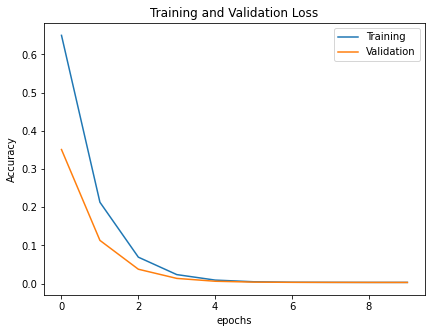

In [48]:
acc = history.history['loss']
val_acc = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Accuracy')


(1, 301)


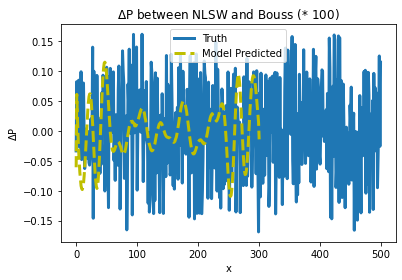

In [49]:
import matplotlib.pyplot as plt
print(np.shape(y_test[0:1]))

y_predict = model.predict(X_test[50:51], verbose=0)
x = pd.read_csv("xmat.csv").values

plt.plot(y_test[:,50:51], linewidth=3, label = 'Truth') # y_test[:][1],
plt.plot(y_predict[0],'y--',linewidth = 3,label = 'Model Predicted') # y_predict[:,1],
plt.title('$\Delta$P between NLSW and Bouss (* 100)')
plt.xlabel('x')
plt.ylabel('$\Delta$P')
plt.legend()
plt.show()

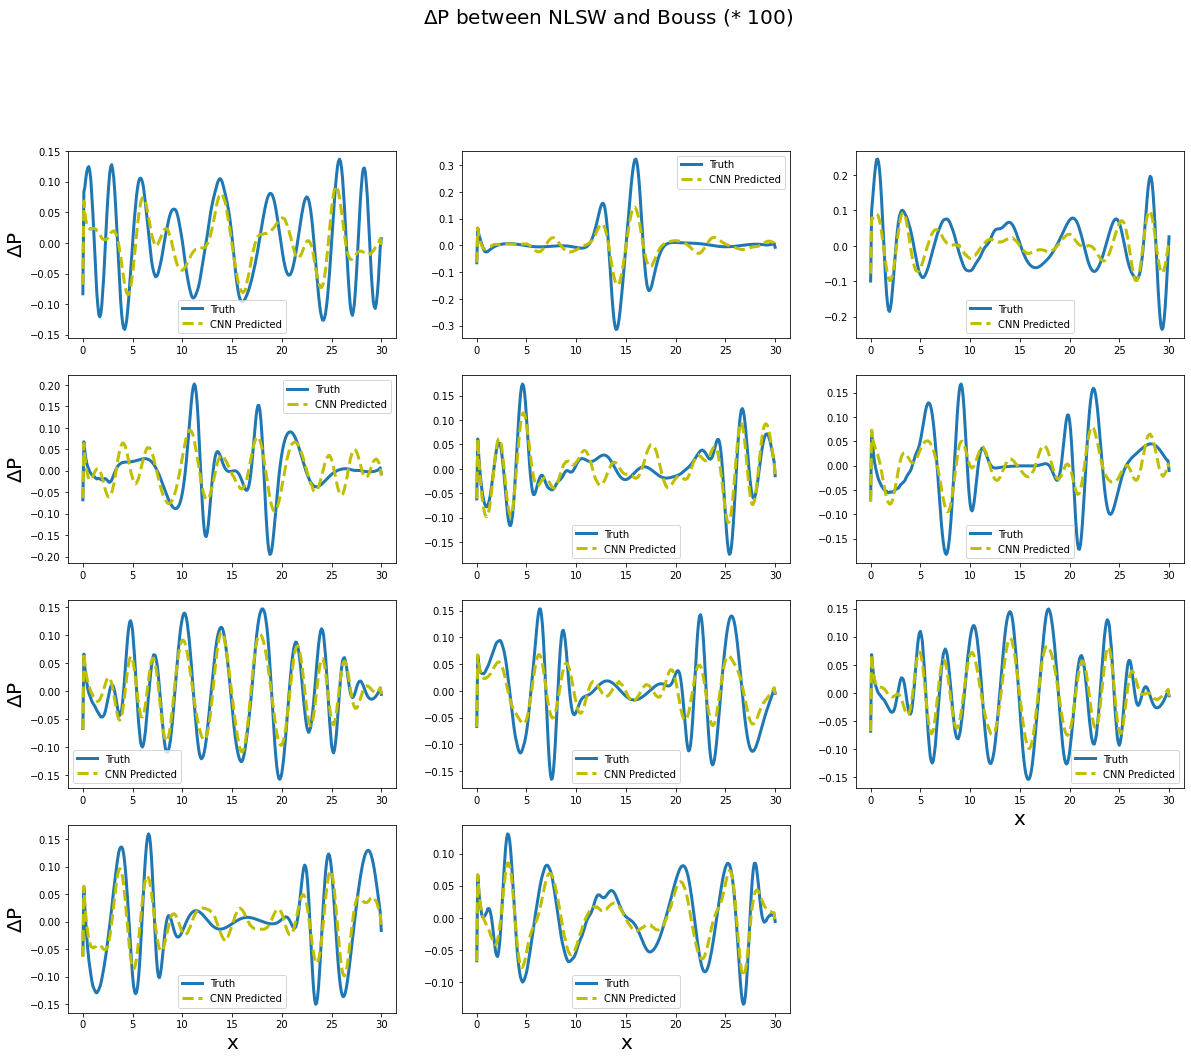

In [50]:
y_predict = model.predict(X_test[0:201], verbose=0)
x = pd.read_csv("xmat.csv").values

plt.figure(figsize=(20, 20))
for i in range(1, 12):
    plt.subplot(5, 3, i)
    plt.plot(x[0,:],np.ndarray.flatten(y_test[i*10,:]), linewidth=3, label = 'Truth') # y_test[:][1],
    plt.plot(x[0,:],np.ndarray.flatten(y_predict[i*10]),'y--',linewidth = 3,label = 'CNN Predicted') # y_predict[:,1],
    plt.suptitle('$\Delta$P between NLSW and Bouss (* 100)', size=20)
    if i in [1,4,7,10]:
        plt.ylabel('$\Delta$P', size=20)
    if i in [9,10,11,12]:
        plt.xlabel('x', size=20)
    plt.legend()

plt.show()

## Test Model